<a href="https://colab.research.google.com/github/costpetrides/FAIRMODE-WG5/blob/main/BaseCASE_Grids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install netCDF4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 43.6 MB/s eta 0:00:00


In [ ]:
pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 20.5 MB/s eta 0:00:00


In [ ]:
pip install folium

# $O_{3}$

In [8]:
import pandas as pd
import xarray as xr
import numpy as np
from scipy.spatial import cKDTree
import netCDF4

# Φόρτωση των δεδομένων από το CSV αρχείο (σταθμοί)
stations = pd.read_csv("yearly_SURF_ppb_O3.csv")

# Εξαγωγή συντεταγμένων σταθμών
station_lons = stations["lon"].values
station_lats = stations["lat"].values

# Φόρτωση δεδομένων NetCDF (μοντέλο)
nc_data = xr.open_dataset("BaseCase_PERT_O3_YEARLY.nc")

# Εξαγωγή συντεταγμένων και συγκεντρώσεων O₃ από το NetCDF
nc_lons = nc_data["lon"].values  # Συντεταγμένες longitude πλέγματος
nc_lats = nc_data["lat"].values  # Συντεταγμένες latitude πλέγματος
nc_ozone = nc_data["SURF_ppb_O3"].values  # Συγκεντρώσεις O₃ (π.χ., [lat, lon])

# Δημιουργία πλέγματος συντεταγμένων για τα κέντρα των κελιών
lon_grid, lat_grid = np.meshgrid(nc_lons, nc_lats)

# Δημιουργία KDTree για τα κέντρα των κελιών του πλέγματος
grid_points = np.column_stack([lon_grid.ravel(), lat_grid.ravel()])
kdtree = cKDTree(grid_points)

# Υπολογισμός των πλησιέστερων κελιών για κάθε σταθμό (βάσει συντεταγμένων)
station_points = np.column_stack([station_lons, station_lats])
distances, indices = kdtree.query(station_points)

# Λήψη των συντεταγμένων και τιμών O₃ από τα πλησιέστερα κελιά
matched_lons = grid_points[indices, 0]  # Πλησιέστερο longitude
matched_lats = grid_points[indices, 1]  # Πλησιέστερο latitude
matched_ozone = nc_ozone.ravel()[indices]  # Τιμές O₃ από το NetCDF

# Προσθήκη των αποτελεσμάτων στο DataFrame των σταθμών
stations["nearest_grid_lon"] = matched_lons
stations["nearest_grid_lat"] = matched_lats
stations["nearest_SURF_ppb_O3"] = matched_ozone

# Δημιουργία της στήλης 'grid_cell_index' αν δεν υπάρχει ήδη
cell_indices = np.indices(lon_grid.shape)
cell_indices_flattened = np.stack(cell_indices, axis=-1).reshape(-1, 2)
stations["grid_cell_index"] = [tuple(cell_indices_flattened[i]) for i in indices]

# Αλλαγή της σειράς των στηλών όπως ζητήθηκε
stations = stations[['lon', 'lat', 'nearest_grid_lon', 'nearest_grid_lat', 'grid_cell_index', 'SURF_ppb_O3', 'nearest_SURF_ppb_O3']]

# Αποθήκευση του ενημερωμένου DataFrame σε νέο αρχείο CSV
stations.to_csv("baseO3nearest_grid.csv", index=False)

# Εμφάνιση των πρώτων γραμμών του ενημερωμένου DataFrame για έλεγχο
stations.head()

,lon,lat,nearest_grid_lon,nearest_grid_lat,grid_cell_index,SURF_ppb_O3,nearest_SURF_ppb_O3
0,13.1945,46.9350,13.15,46.925,"(289, 282)",42.744987,42.685699
1,13.9145,46.6954,13.95,46.675,"(284, 290)",35.835648,35.785275
2,14.4574,46.8666,14.45,46.875,"(288, 295)",37.613846,37.578777
3,16.0625,48.3294,16.05,48.325,"(317, 311)",31.038498,31.075140
4,16.3315,48.1247,16.35,48.125,"(313, 314)",28.654785,28.671650


In [15]:
print("Total stations:", len(stations))
print("Unique grid cells:", stations["grid_cell_index"].nunique())

Total stations: 3263
Unique grid cells: 3263


# $NO_{2}$

In [16]:
import pandas as pd
import xarray as xr
import numpy as np
from scipy.spatial import cKDTree
import netCDF4

# Φόρτωση των δεδομένων από το CSV αρχείο (σταθμοί)
stations = pd.read_csv("yearly_SURF_ug_NO2.csv")

# Εξαγωγή συντεταγμένων σταθμών
station_lons = stations["lon"].values
station_lats = stations["lat"].values

# Φόρτωση δεδομένων NetCDF (μοντέλο)
nc_data = xr.open_dataset("BaseCase_PERT_NO2_YEARLY.nc")

# Εξαγωγή συντεταγμένων και συγκεντρώσεων O₃ από το NetCDF
nc_lons = nc_data["lon"].values  # Συντεταγμένες longitude πλέγματος
nc_lats = nc_data["lat"].values  # Συντεταγμένες latitude πλέγματος
nc_ozone = nc_data["SURF_ug_NO2"].values  # Συγκεντρώσεις O₃ (π.χ., [lat, lon])

# Δημιουργία πλέγματος συντεταγμένων για τα κέντρα των κελιών
lon_grid, lat_grid = np.meshgrid(nc_lons, nc_lats)

# Δημιουργία KDTree για τα κέντρα των κελιών του πλέγματος
grid_points = np.column_stack([lon_grid.ravel(), lat_grid.ravel()])
kdtree = cKDTree(grid_points)

# Υπολογισμός των πλησιέστερων κελιών για κάθε σταθμό (βάσει συντεταγμένων)
station_points = np.column_stack([station_lons, station_lats])
distances, indices = kdtree.query(station_points)

# Λήψη των συντεταγμένων και τιμών O₃ από τα πλησιέστερα κελιά
matched_lons = grid_points[indices, 0]  # Πλησιέστερο longitude
matched_lats = grid_points[indices, 1]  # Πλησιέστερο latitude
matched_ozone = nc_ozone.ravel()[indices]  # Τιμές O₃ από το NetCDF

# Προσθήκη των αποτελεσμάτων στο DataFrame των σταθμών
stations["nearest_grid_lon"] = matched_lons
stations["nearest_grid_lat"] = matched_lats
stations["nearest_SURF_ug_NO2"] = matched_ozone

# Δημιουργία της στήλης 'grid_cell_index' αν δεν υπάρχει ήδη
cell_indices = np.indices(lon_grid.shape)
cell_indices_flattened = np.stack(cell_indices, axis=-1).reshape(-1, 2)
stations["grid_cell_index"] = [tuple(cell_indices_flattened[i]) for i in indices]

# Αλλαγή της σειράς των στηλών όπως ζητήθηκε
stations = stations[['lon', 'lat', 'nearest_grid_lon', 'nearest_grid_lat', 'grid_cell_index', 'SURF_ug_NO2', 'nearest_SURF_ug_NO2']]

# Αποθήκευση του ενημερωμένου DataFrame σε νέο αρχείο CSV
stations.to_csv("baseNO2nearest_grid.csv", index=False)

# Εμφάνιση των πρώτων γραμμών του ενημερωμένου DataFrame για έλεγχο
stations.head()

,lon,lat,nearest_grid_lon,nearest_grid_lat,grid_cell_index,SURF_ug_NO2,nearest_SURF_ug_NO2
0,13.1945,46.9350,13.15,46.925,"(289, 282)",1.134969,1.089322
1,13.9145,46.6954,13.95,46.675,"(284, 290)",2.722058,2.686655
2,14.4574,46.8666,14.45,46.875,"(288, 295)",3.815312,3.766372
3,16.0625,48.3294,16.05,48.325,"(317, 311)",9.188441,9.036489
4,16.3315,48.1247,16.35,48.125,"(313, 314)",16.215141,16.105865


In [17]:
print("Total stations:", len(stations))
print("Unique grid cells:", stations["grid_cell_index"].nunique())

Total stations: 3263
Unique grid cells: 3263


# $PM_{2.5}$

In [97]:
import pandas as pd
import xarray as xr
import numpy as np
from scipy.spatial import cKDTree
import netCDF4

# Φόρτωση των δεδομένων από το CSV αρχείο (σταθμοί)
stations = pd.read_csv("yearly_SURF_ug_PM25_rh50.csv")

# Εξαγωγή συντεταγμένων σταθμών
station_lons = stations["lon"].values
station_lats = stations["lat"].values

# Φόρτωση δεδομένων NetCDF (μοντέλο)
nc_data = xr.open_dataset("BaseCase_PERT_PM25_rh50_YEARLY.nc")

# Εξαγωγή συντεταγμένων και συγκεντρώσεων O₃ από το NetCDF
nc_lons = nc_data["lon"].values  # Συντεταγμένες longitude πλέγματος
nc_lats = nc_data["lat"].values  # Συντεταγμένες latitude πλέγματος
nc_ozone = nc_data["SURF_ug_PM25_rh50"].values  # Συγκεντρώσεις O₃ (π.χ., [lat, lon])

# Δημιουργία πλέγματος συντεταγμένων για τα κέντρα των κελιών
lon_grid, lat_grid = np.meshgrid(nc_lons, nc_lats)

# Δημιουργία KDTree για τα κέντρα των κελιών του πλέγματος
grid_points = np.column_stack([lon_grid.ravel(), lat_grid.ravel()])
kdtree = cKDTree(grid_points)

# Υπολογισμός των πλησιέστερων κελιών για κάθε σταθμό (βάσει συντεταγμένων)
station_points = np.column_stack([station_lons, station_lats])
distances, indices = kdtree.query(station_points)

# Λήψη των συντεταγμένων και τιμών O₃ από τα πλησιέστερα κελιά
matched_lons = grid_points[indices, 0]  # Πλησιέστερο longitude
matched_lats = grid_points[indices, 1]  # Πλησιέστερο latitude
matched_ozone = nc_ozone.ravel()[indices]  # Τιμές O₃ από το NetCDF

# Προσθήκη των αποτελεσμάτων στο DataFrame των σταθμών
stations["nearest_grid_lon"] = matched_lons
stations["nearest_grid_lat"] = matched_lats
stations["nearest_SURF_ug_PM25_rh50"] = matched_ozone

# Δημιουργία της στήλης 'grid_cell_index' αν δεν υπάρχει ήδη
cell_indices = np.indices(lon_grid.shape)
cell_indices_flattened = np.stack(cell_indices, axis=-1).reshape(-1, 2)
stations["grid_cell_index"] = [tuple(cell_indices_flattened[i]) for i in indices]

# Αλλαγή της σειράς των στηλών όπως ζητήθηκε
stations = stations[['lon', 'lat', 'nearest_grid_lon', 'nearest_grid_lat', 'grid_cell_index', 'SURF_ug_PM25_rh50', 'nearest_SURF_ug_PM25_rh50']]

# Αποθήκευση του ενημερωμένου DataFrame σε νέο αρχείο CSV
stations.to_csv("basePM25nearest_grid.csv", index=False)

# Εμφάνιση των πρώτων γραμμών του ενημερωμένου DataFrame για έλεγχο
stations.head()

,lon,lat,nearest_grid_lon,nearest_grid_lat,grid_cell_index,SURF_ug_PM25_rh50,nearest_SURF_ug_PM25_rh50
0,13.1945,46.9350,13.15,46.925,"(289, 282)",3.370927,3.208787
1,13.9145,46.6954,13.95,46.675,"(284, 290)",6.053020,5.893659
2,14.4574,46.8666,14.45,46.875,"(288, 295)",5.833692,5.619750
3,16.0625,48.3294,16.05,48.325,"(317, 311)",9.499794,8.903049
4,16.3315,48.1247,16.35,48.125,"(313, 314)",10.630700,10.086845


In [98]:
print("Total stations:", len(stations))
print("Unique grid cells:", stations["grid_cell_index"].nunique())

Total stations: 3263
Unique grid cells: 3263


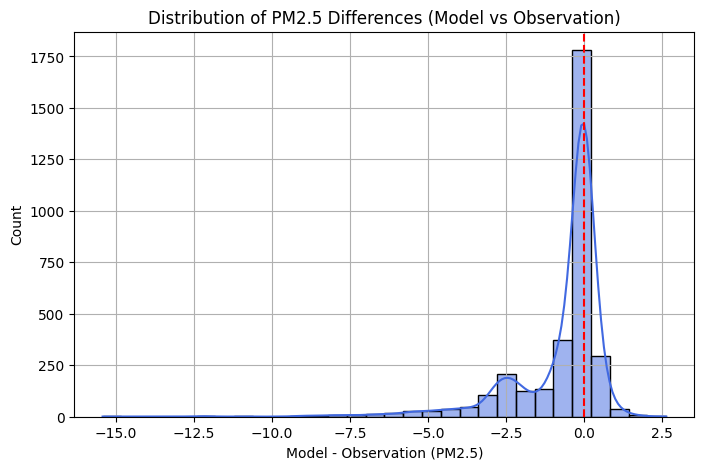

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute difference
stations["PM25_difference"] = stations["nearest_SURF_ug_PM25_rh50"] - stations["SURF_ug_PM25_rh50"]

# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(stations["PM25_difference"], bins=30, kde=True, color="royalblue")
plt.axvline(0, color="red", linestyle="dashed", linewidth=1.5)
plt.xlabel("Model - Observation (PM2.5)")
plt.grid(True)
plt.ylabel("Count")
plt.title("Distribution of PM2.5 Differences (Model vs Observation)")
plt.show()

In [99]:
import pandas as pd
from scipy.stats import linregress

# Assuming 'stations' is a DataFrame containing the two columns:
observed_pm25 = stations["SURF_ug_PM25_rh50"]
modeled_pm25 = stations["nearest_SURF_ug_PM25_rh50"]



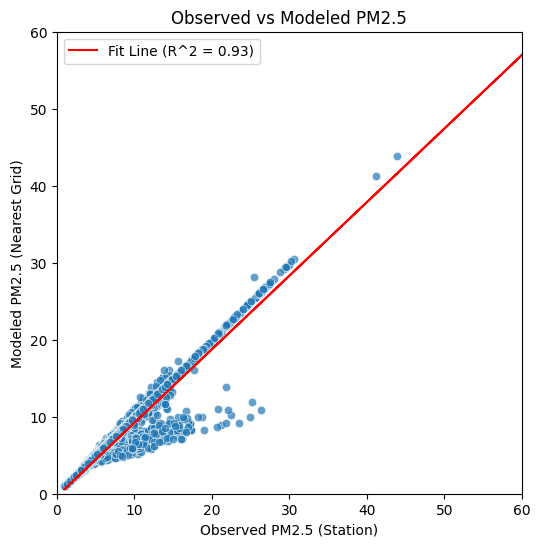

Observed PM2.5 Statistics:
count    3263.000000
mean        9.190701
std         5.944471
min         0.946804
25%         6.594661
50%         8.488631
75%        10.389446
max       239.087143
Name: SURF_ug_PM25_rh50, dtype: float64

Modeled PM2.5 Statistics:
count    3263.000000
mean        8.436716
std         5.897589
min         0.941267
25%         5.880760
50%         7.427149
75%         9.491102
max       239.088455
Name: nearest_SURF_ug_PM25_rh50, dtype: float64

Correlation Coefficient: 0.962985022842239

Linear Regression Results:
Slope: 0.9553905110776091, Intercept: -0.34399222338583435, R-squared: 0.927340154218467, P-value: 0.0


In [84]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Assuming 'stations' is a DataFrame containing the two columns:
observed_pm25 = stations["SURF_ug_PM25_rh50"]
modeled_pm25 = stations["nearest_SURF_ug_PM25_rh50"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(observed_pm25, modeled_pm25)

# Calculate R-squared
r_squared = r_value**2

# Create the scatter plot
plt.figure(figsize=(6, 6))
sns.scatterplot(x=observed_pm25, y=modeled_pm25, alpha=0.7)

# Plot the regression line
plt.plot(observed_pm25, slope * observed_pm25 + intercept, color='red', label=f"Fit Line (R^2 = {r_squared:.2f})")

# Labels and title
plt.xlabel("Observed PM2.5 (Station)")
plt.xlim(0, 60)
plt.ylim(0, 60)
plt.ylabel("Modeled PM2.5 (Nearest Grid)")
plt.title("Observed vs Modeled PM2.5")

# Display the legend
plt.legend()

# Show the plot
plt.show()

# Descriptive statistics
observed_stats = observed_pm25.describe()
modeled_stats = modeled_pm25.describe()

# Correlation coefficient
correlation = observed_pm25.corr(modeled_pm25)

# Linear regression (optional, if you want the fit line statistics)
slope, intercept, r_value, p_value, std_err = linregress(observed_pm25, modeled_pm25)

# Print results
print("Observed PM2.5 Statistics:")
print(observed_stats)
print("\nModeled PM2.5 Statistics:")
print(modeled_stats)
print("\nCorrelation Coefficient:", correlation)
print("\nLinear Regression Results:")
print(f"Slope: {slope}, Intercept: {intercept}, R-squared: {r_value**2}, P-value: {p_value}")


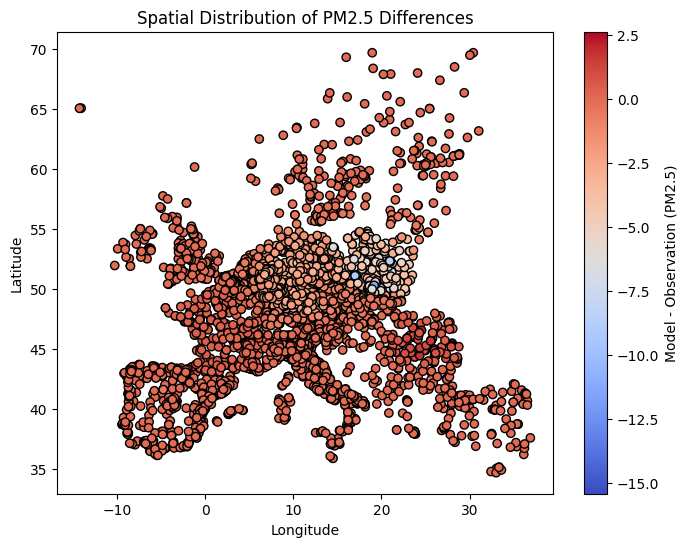

In [37]:
import geopandas as gpd

plt.figure(figsize=(8, 6))
scatter = plt.scatter(stations["lon"], stations["lat"], c=stations["PM25_difference"], cmap="coolwarm", edgecolors="black")
plt.colorbar(label="Model - Observation (PM2.5)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Spatial Distribution of PM2.5 Differences")
plt.show()